In [1]:
#Import Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import random

from yelpapi import YelpAPI
from pprint import pprint
 
os.chdir('Resources')
results = pd.DataFrame([])
 
for counter, file in enumerate(glob.glob("bls_qcew_maps_excel-*")):
    namedf = pd.read_csv(file, skiprows=3)
    results = results.append(namedf)
 
results.to_csv('combinedfile.csv')



In [2]:
#Format DataFrame
CountyIncome = pd.read_csv('combinedfile.csv')
CountyIncome = CountyIncome.rename(columns = {'USPS':'State', 
                                             'Area Name': 'County'})
#CountyIncome=CountyIncome.set_index('State')
CountyIncome = CountyIncome.drop(columns=['Unnamed: 0','FIPS', 'Quarter', 'Industry'])
CountyIncome.head()

,County,Year,No Of Establishments,Employment,One-Year Employment Gain/Loss (Percent),Average Weekly Wages,On-Year Weekly Wages Gain/Loss (Percent),State
0,Allegany County,2019.0,1564.0,29113.0,0.3,751.0,2.6,MD
1,Anne Arundel County,2019.0,15384.0,270523.0,0.3,1194.0,3.2,MD
2,Baltimore County,2019.0,21389.0,378706.0,0.5,1122.0,1.2,MD
3,Calvert County,2019.0,1886.0,22805.0,-0.3,988.0,-0.3,MD
4,Caroline County,2019.0,687.0,9993.0,2.4,831.0,4.8,MD


In [3]:
CountyIncome_randomdf = CountyIncome.sample(n = 50) 
CountyIncome_randomdf['County and State'] = (CountyIncome_randomdf["County"] + ", " + CountyIncome_randomdf["State"])
CountyIncome_randomdf
#Counties = (CountyIncome[['County', 'State']])
#print(Counties)



,County,Year,No Of Establishments,Employment,One-Year Employment Gain/Loss (Percent),Average Weekly Wages,On-Year Weekly Wages Gain/Loss (Percent),State,County and State
1069,Cass County,2019.0,287.0,5550.0,3.4,729.0,5.5,IL,"Cass County, IL"
893,Hancock County,2019.0,1586.0,25579.0,10.5,934.0,5.5,IN,"Hancock County, IN"
1522,Metcalfe County,2019.0,180.0,1836.0,-0.6,682.0,4.3,KY,"Metcalfe County, KY"
1713,Fayette County,2019.0,679.0,6988.0,-2.0,690.0,1.3,IA,"Fayette County, IA"
1866,Duval County,2019.0,30308.0,519788.0,1.5,1125.0,2.8,FL,"Duval County, FL"
3017,Logan County,2019.0,95.0,628.0,-3.2,565.0,6.2,ND,"Logan County, ND"
1603,Luquillo Municipio,2019.0,143.0,1930.0,10.4,418.0,-4.8,PR,"Luquillo Municipio, PR"
2633,Craven County,2019.0,2293.0,39694.0,1.6,835.0,2.8,NC,"Craven County, NC"
272,Kane County,2019.0,340.0,3355.0,0.4,605.0,-0.8,UT,"Kane County, UT"
3184,Barry County,2019.0,865.0,12450.0,1.3,767.0,2.0,MI,"Barry County, MI"


In [4]:
api_key = '9nJV8mKF__qDKP8k7GzWFOoTbXjCPTCKDliNkjhv4jFyBukbefp-V1HA0gl1TYnCH3s0E0CvtwLj9440c4tlb7Wu9F94lKy9voJTqrYUQ6wSiQIzvPdYiAT69byWXXYx' 
yelp_api = YelpAPI(api_key)
total_fastfood = []
for county in CountyIncome_randomdf['County and State']:
    
    search_results = yelp_api.search_query(term = 'fast food', location = county)
    total_fastfood.append(search_results['total'])
    
len(total_fastfood)
print(total_fastfood)

[199, 867, 150, 100, 1200, 8, 21, 375, 38, 865, 5200, 145, 29, 394, 101, 7600, 216, 1700, 56, 18, 171, 864, 2200, 199, 1400, 173, 787, 121, 8, 37, 408, 1700, 751, 133, 1600, 748, 36, 923, 268, 185, 735, 330, 47, 33, 327, 867, 1800, 161, 970, 7]


In [5]:
County_and_State = CountyIncome_randomdf['County and State']
Average_Weekly_Wages = CountyIncome_randomdf['Average Weekly Wages']

In [6]:
County_FastFood_df = pd.DataFrame({"Counties" : County_and_State, "Total Fast Food Restaurants" : total_fastfood, 'Average Weekly Wages' : Average_Weekly_Wages })
County_FastFood_df

,Counties,Total Fast Food Restaurants,Average Weekly Wages
1069,"Cass County, IL",199,729.0
893,"Hancock County, IN",867,934.0
1522,"Metcalfe County, KY",150,682.0
1713,"Fayette County, IA",100,690.0
1866,"Duval County, FL",1200,1125.0
3017,"Logan County, ND",8,565.0
1603,"Luquillo Municipio, PR",21,418.0
2633,"Craven County, NC",375,835.0
272,"Kane County, UT",38,605.0
3184,"Barry County, MI",865,767.0


In [7]:
County_FastFood_df_indexed = County_FastFood_df.set_index('Counties')

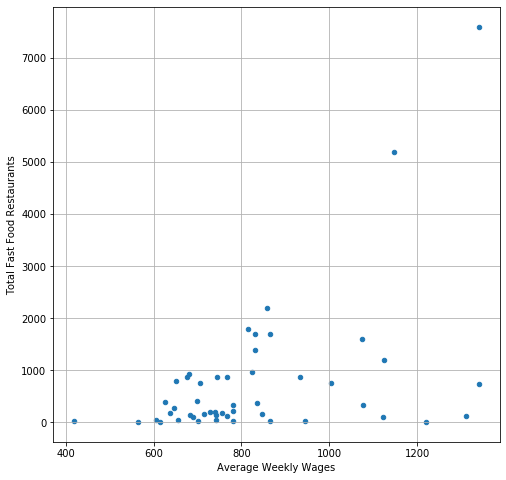

In [8]:
County_FastFood_df_indexed.plot(kind='scatter', x = 'Average Weekly Wages', y = 'Total Fast Food Restaurants', grid = True, figsize=(8,8))


Text(0.5, 1.0, 'Weekly Wages per County and State')

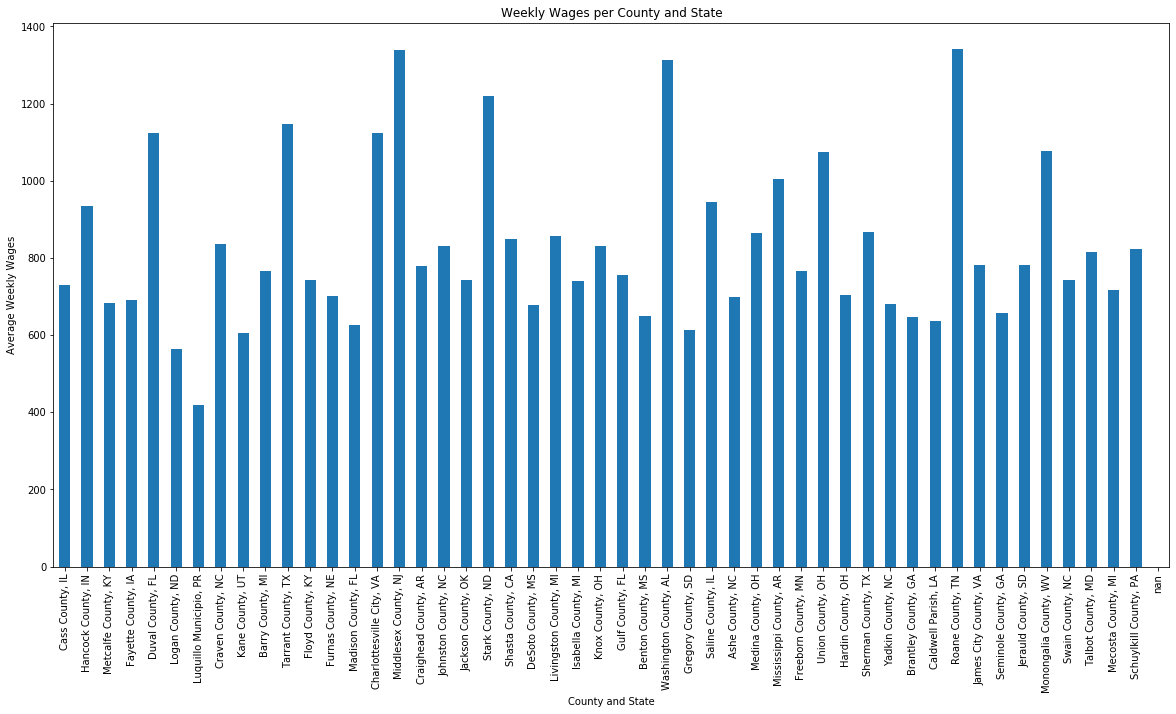

In [9]:

County_FastFood_df_indexed["Average Weekly Wages"].plot(kind="bar", figsize=(20,10))
plt.xlabel("County and State")
plt.ylabel("Average Weekly Wages")
plt.title("Weekly Wages per County and State")


{'whiskers': [<matplotlib.lines.Line2D at 0x119778dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x1177ab4a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1197789e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1177abb38>],
 'fliers': [<matplotlib.lines.Line2D at 0x1177abe80>],
 'means': []}

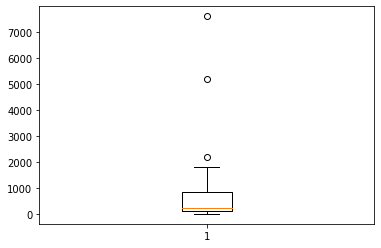

In [10]:
plt.boxplot(County_FastFood_df_indexed["Total Fast Food Restaurants"])               

//anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
//anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'whiskers': [<matplotlib.lines.Line2D at 0x119ae9828>,
 'caps': [<matplotlib.lines.Line2D at 0x119ae9c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x119ae94e0>],
 'medians': [<matplotlib.lines.Line2D at 0x119b8f320>],
 'fliers': [<matplotlib.lines.Line2D at 0x119b8f668>],
 'means': []}

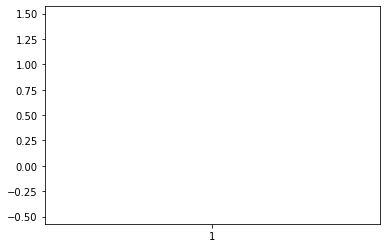

In [11]:
plt.boxplot(County_FastFood_df_indexed["Average Weekly Wages"])        

In [12]:
quartiles = County_FastFood_df_indexed["Average Weekly Wages"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 690.0
The upper quartile of temperatures is: 866.0
The interquartile range of temperatures is: 176.0
The the median of temperatures is: 767.0 
Values below 426.0 could be outliers.
Values above 1130.0 could be outliers.


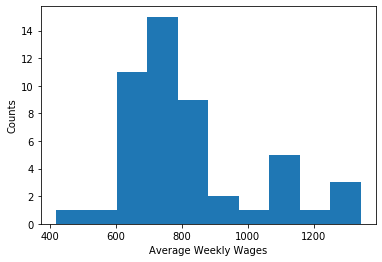

AttributeError: 'NormaltestResult' object has no attribute 'sample'

In [21]:
import scipy.stats as sts
plt.hist(County_FastFood_df_indexed["Average Weekly Wages"])
plt.xlabel('Average Weekly Wages')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(County_FastFood_df_indexed["Average Weekly Wages"]).sample(100))